In [ ]:
#Reading binary file format from ADLS Gen2 using Python
import os
import re
import random
import base64
import pandas as pd
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt
from azure.storage.blob import BlobServiceClient, ContainerClient
from concurrent.futures import ThreadPoolExecutor


In [2]:
connection_string = "DefaultEndpointsProtocol=https;AccountName=adfstoragelab01;AccountKey=ZKYniERkZ8/CuDtFWKzNzCeSNqWIHZb9OndCimIUdjN9BsISxLEbpRhGBhTAam6yBJG3tQBra/KV+AStFAYu2w==;EndpointSuffix=core.windows.net"
container_name = "images"

blob_service_client = BlobServiceClient.from_connection_string(connection_string)
container_client = blob_service_client.get_container_client(container_name)


In [ ]:
#this is for uploading mnist to my container.It will skip as all images already been uploaded by me.
local_folder_path = "../mnist_png/training"

def upload_image(digit, image_name):
    local_image_path = os.path.join(local_folder_path, digit, image_name)
    blob_path = f"imageshandwritten{digit}/{image_name}"
    blob_client = container_client.get_blob_client(blob_path)

    try:
        if blob_client.exists():
            print(f"Skipped: {blob_path}")
            return
        with open(local_image_path, "rb") as data:
            blob_client.upload_blob(data)
        print(f"Uploaded: {blob_path}")
    except Exception as e:
        print(f"Failed: {blob_path}, Error: {e}")

upload_tasks = [
    (digit, image_name)
    for digit in os.listdir(local_folder_path)
    if os.path.isdir(os.path.join(local_folder_path, digit))
    for image_name in os.listdir(os.path.join(local_folder_path, digit))
]

with ThreadPoolExecutor(max_workers=32) as executor:
    executor.map(lambda args: upload_image(*args), upload_tasks)


Skipped: imageshandwritten0/10121.png
Skipped: imageshandwritten0/10237.png
Skipped: imageshandwritten0/10204.png
Skipped: imageshandwritten0/10010.png
Skipped: imageshandwritten0/10221.png
Skipped: imageshandwritten0/10128.png
Skipped: imageshandwritten0/10188.png
Skipped: imageshandwritten0/10120.png
Skipped: imageshandwritten0/10167.png
Skipped: imageshandwritten0/10069.png
Skipped: imageshandwritten0/10083.png
Skipped: imageshandwritten0/10240.png
Skipped: imageshandwritten0/10176.png
Skipped: imageshandwritten0/10025.png
Skipped: imageshandwritten0/10045.png
Skipped: imageshandwritten0/10230.png
Skipped: imageshandwritten0/1.png
Skipped: imageshandwritten0/10107.png
Skipped: imageshandwritten0/1000.png
Skipped: imageshandwritten0/10119.png
Skipped: imageshandwritten0/10071.png
Skipped: imageshandwritten0/10242.png
Skipped: imageshandwritten0/10168.png
Skipped: imageshandwritten0/10080.png
Skipped: imageshandwritten0/10195.png
Skipped: imageshandwritten0/10026.png
Skipped: imagesha

In [4]:
print("Listing files in 'imageshandwritten':")
blob_list = container_client.list_blobs(name_starts_with="imageshandwritten")
all_blob_names = [blob.name for blob in blob_list]
for name in all_blob_names:
    print(name)


Listing files in 'imageshandwritten':
imageshandwritten0/1.png
imageshandwritten0/1000.png
imageshandwritten0/10005.png
imageshandwritten0/10010.png
imageshandwritten0/10022.png
imageshandwritten0/10025.png
imageshandwritten0/10026.png
imageshandwritten0/10045.png
imageshandwritten0/10069.png
imageshandwritten0/10071.png
imageshandwritten0/10080.png
imageshandwritten0/10083.png
imageshandwritten0/10107.png
imageshandwritten0/10119.png
imageshandwritten0/10120.png
imageshandwritten0/10121.png
imageshandwritten0/10128.png
imageshandwritten0/10140.png
imageshandwritten0/1015.png
imageshandwritten0/10167.png
imageshandwritten0/10168.png
imageshandwritten0/10176.png
imageshandwritten0/1018.png
imageshandwritten0/10188.png
imageshandwritten0/10195.png
imageshandwritten0/10203.png
imageshandwritten0/10204.png
imageshandwritten0/10221.png
imageshandwritten0/10230.png
imageshandwritten0/10237.png
imageshandwritten0/10240.png
imageshandwritten0/10242.png
imageshandwritten0/10245.png
imageshandwr

In [5]:
digit_groups = {str(i): [] for i in range(10)}

for blob_name in all_blob_names:
    match = re.match(r"imageshandwritten(\d)/", blob_name)
    if match:
        digit = match.group(1)
        digit_groups[digit].append(blob_name)

for digit, blobs in digit_groups.items():
    print(f"Digit {digit}: {len(blobs)} images")

selected_blobs = []
for digit, blobs in digit_groups.items():
    selected = random.sample(blobs, min(5, len(blobs)))
    print(f"Selected from digit {digit}:")
    for s in selected:
        print(" ", s)
    selected_blobs.extend(selected)


Digit 0: 5923 images
Digit 1: 6742 images
Digit 2: 5958 images
Digit 3: 6131 images
Digit 4: 5842 images
Digit 5: 5421 images
Digit 6: 5918 images
Digit 7: 6265 images
Digit 8: 5851 images
Digit 9: 5949 images
Selected from digit 0:
  imageshandwritten0/9034.png
  imageshandwritten0/41286.png
  imageshandwritten0/54089.png
  imageshandwritten0/56724.png
  imageshandwritten0/53537.png
Selected from digit 1:
  imageshandwritten1/44046.png
  imageshandwritten1/53904.png
  imageshandwritten1/54329.png
  imageshandwritten1/50918.png
  imageshandwritten1/23703.png
Selected from digit 2:
  imageshandwritten2/13522.png
  imageshandwritten2/45825.png
  imageshandwritten2/16403.png
  imageshandwritten2/34385.png
  imageshandwritten2/39421.png
Selected from digit 3:
  imageshandwritten3/56657.png
  imageshandwritten3/9739.png
  imageshandwritten3/14456.png
  imageshandwritten3/20626.png
  imageshandwritten3/35180.png
Selected from digit 4:
  imageshandwritten4/32802.png
  imageshandwritten4/25184

In [6]:
image_data = []

for blob_name in selected_blobs:
    blob_client = blob_service_client.get_blob_client(container=container_name, blob=blob_name)
    print(f"Downloading: {blob_name}")
    stream = blob_client.download_blob()
    image_bytes = stream.readall()
    base64_str = base64.b64encode(image_bytes).decode("utf-8")
    image_data.append({"filename": blob_name, "image_base64": base64_str})


Downloading: imageshandwritten0/9034.png
Downloading: imageshandwritten0/41286.png
Downloading: imageshandwritten0/54089.png
Downloading: imageshandwritten0/56724.png
Downloading: imageshandwritten0/53537.png
Downloading: imageshandwritten1/44046.png
Downloading: imageshandwritten1/53904.png
Downloading: imageshandwritten1/54329.png
Downloading: imageshandwritten1/50918.png
Downloading: imageshandwritten1/23703.png
Downloading: imageshandwritten2/13522.png
Downloading: imageshandwritten2/45825.png
Downloading: imageshandwritten2/16403.png
Downloading: imageshandwritten2/34385.png
Downloading: imageshandwritten2/39421.png
Downloading: imageshandwritten3/56657.png
Downloading: imageshandwritten3/9739.png
Downloading: imageshandwritten3/14456.png
Downloading: imageshandwritten3/20626.png
Downloading: imageshandwritten3/35180.png
Downloading: imageshandwritten4/32802.png
Downloading: imageshandwritten4/25184.png
Downloading: imageshandwritten4/12058.png
Downloading: imageshandwritten4/4860

In [7]:
df = pd.DataFrame(image_data)
df.to_csv("mnist_images.csv", index=False)
print("Image data saved to 'mnist_images.csv'")


Image data saved to 'mnist_images.csv'


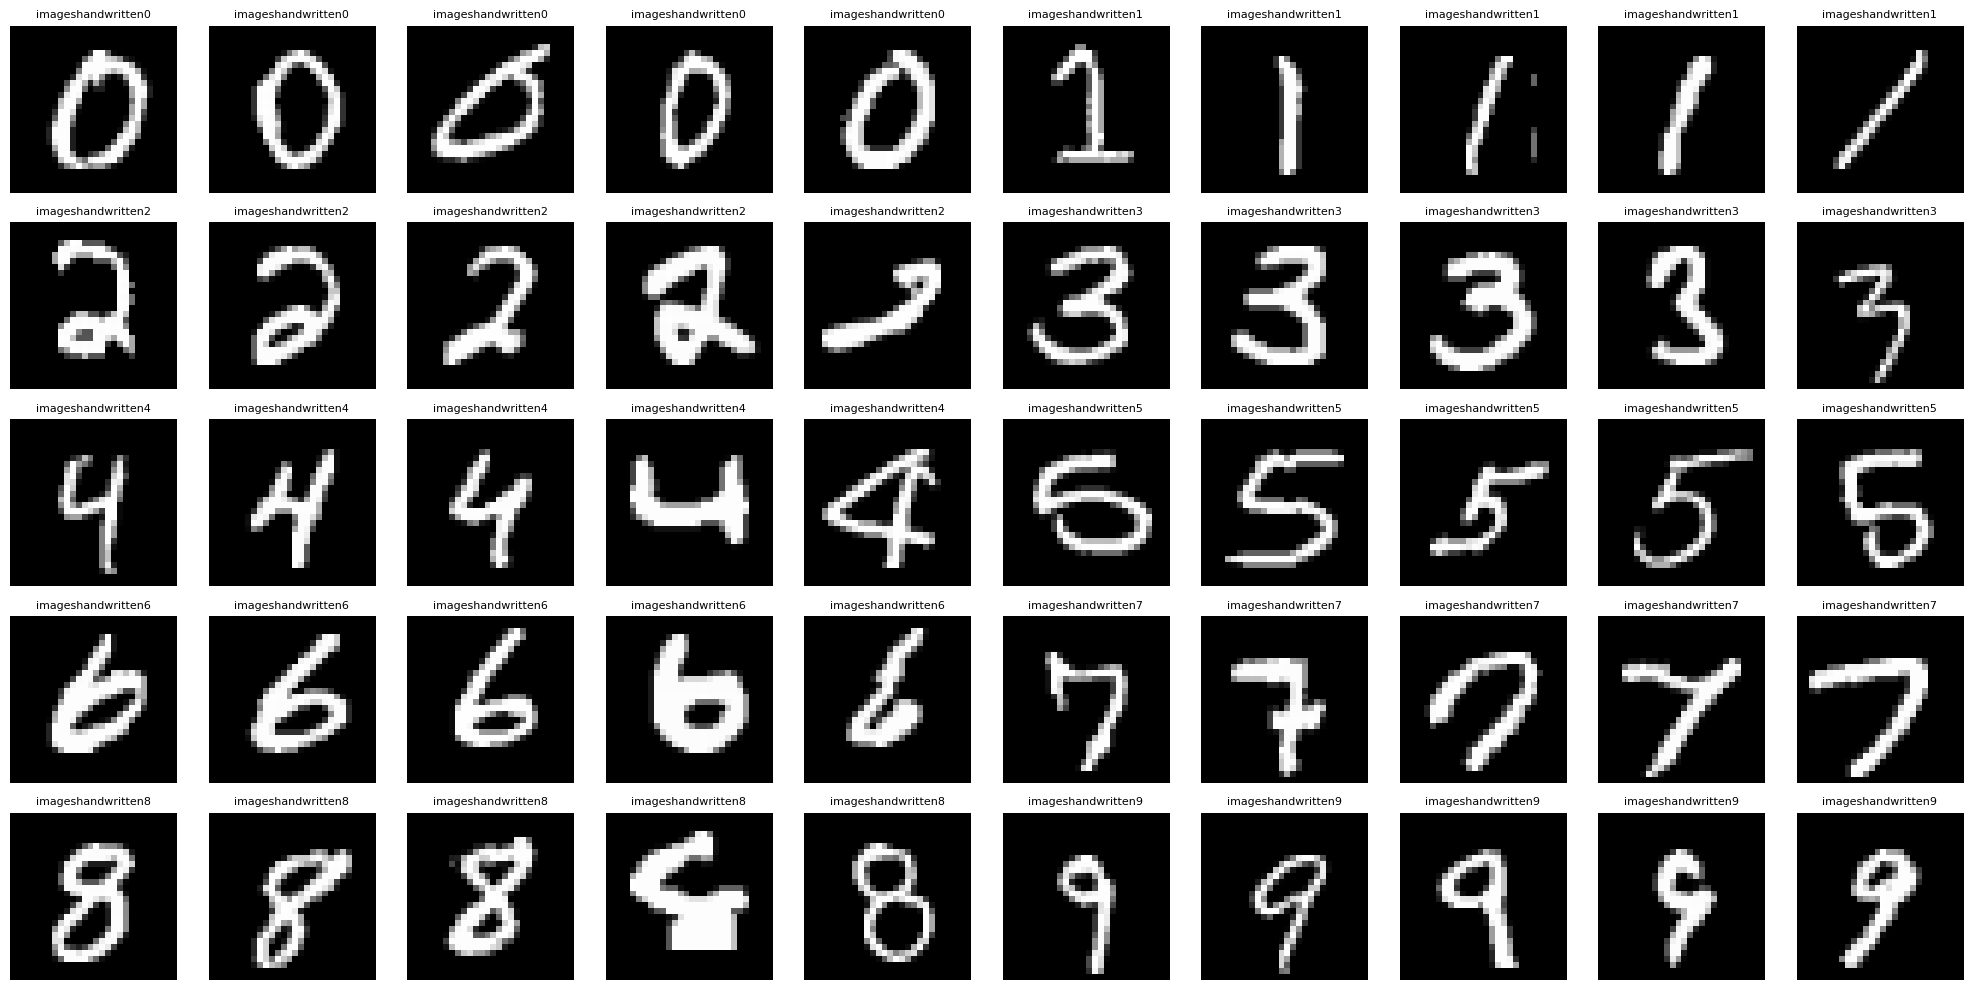

In [8]:
num_images = 50
rows, cols = 5, 10

plt.figure(figsize=(20, 10))

for i in range(min(num_images, len(df))):
    base64_str = df.loc[i, 'image_base64']
    image_bytes = base64.b64decode(base64_str)
    image = Image.open(BytesIO(image_bytes))

    plt.subplot(rows, cols, i + 1)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.title(df.loc[i, 'filename'].split("/")[-2], fontsize=8)

plt.tight_layout()
plt.show()
